In [2]:
#packages
import numpy as np
import pandas as pd 


from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, f1_score, r2_score, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from sklearn.neural_network import MLPClassifier
!pip install imblearn
from imblearn.over_sampling import SMOTE

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model, Sequential

Opening the datasets:

In [3]:
data= pd.read_csv("data3.csv")
artists=pd.read_csv("data_by_artist.csv")
genres= pd.read_csv("data_w_genres.csv")

data=data[data["year"]>2019]
print(len(data))

print()

#for idx, artist in enumerate(artists['artists']):
 #   if artist in list(data['artists_clean']):
#        print(idx, artist)

#multi = data.set_index(['artists_clean'])  
#print(multi.loc[('Joni Mitchell')])  

#creating binary variable (popular/not popular)

6134



Cleaning the variable "artists" on the "data" dataset:

In [4]:
artists_clean1=[]
for artist in data["artists"]:
    feat=[]
    artist=artist.replace('[', '')
    artist=artist.replace(']', '')
    artist=artist.replace("'", '')
    if "," in artist:
      #  print(artist.split(", "))
        artist= artist.split(", ")
       
        #artists_clean1.append(artist)      #take list artists   
        artists_clean1.append(artist[0])      #take only first element (artist)
       
    else: 
        artists_clean1.append(artist)
        
#print(artists_clean1)
print(len(artists_clean1))
artists_clean=pd.Series(artists_clean1)

data.reset_index(drop=True, inplace=True)
artists_clean.reset_index(drop=True, inplace=True)
data["artists_clean"]=artists_clean


6134


Adding the variable "popularity_artist" to the "data" dataset (list)

In [5]:
#dealing with featurings lists
popularity_artist1=[]
for i in range(0,len(data['artists'])):
    l=[]
    for j in range(0,len(artists['artists'])):
        if isinstance(data['artists_clean'][i], list) and artists['artists'][j] in data['artists_clean'][i]:
            #print(artists['popularity'][j])
            print(data['artists_clean'][i])
            l.append(int(artists['popularity'][j]))
            popularity_artist1.append(np.mean(l))

KeyboardInterrupt: 

Adding the popularity of the artist next to the songs' entries

In [48]:
popularity_artist1=[]
for i in range(0,len(data['artists'])):
    if data['artists_clean'][i] not in list(artists['artists']):
            popularity_artist1.append(0)
    else:
        for j in range(0,len(artists['artists'])):

            if data['artists_clean'][i] == artists['artists'][j]:
                #print(artists['popularity'][j])
                print(data['artists_clean'][i])
                popularity_artist1.append(int(artists['popularity'][j]))


                
                 
popularity_artist=pd.Series(popularity_artist1) 
popularity_artist.reset_index(drop=True, inplace=True)
data["popularity_artist"]=popularity_artist


Joni Mitchell
Joni Mitchell
Joni Mitchell
Joni Mitchell
Joni Mitchell
Joni Mitchell
Joni Mitchell
Joni Mitchell
Joni Mitchell
Joni Mitchell
Richard Wagner
RichaadEB
The Rolling Stones
Busted
Zola Bryon
Ema Spatula
not applicable
Hammock
Johann Strauss II
Schoolgirl Byebye
Carl Millöcker
Nikky Philip
Johann Strauss II
GabeGon
Franz von Suppé
Dannymusic75861
Josef Strauss
NOIZ
Johann Strauss II
2.99 RECORDS
Franz von Suppé
manchot
Johann Strauss II
Nitish Raj Yadav
Carl Zeller
Johann Strauss I
Johann Strauss I
Johann Strauss II
Johann Strauss II
Johann Strauss II
Johann Strauss II
Johann Strauss II
Johann Strauss II
Smooth Dinner Jazz
Dinner Jazz Orchestra
Smooth Jazz New York
Smooth Jazz New York
Block & Crown
Block & Crown
Block & Crown
Sunday Morning Jazz
Smooth Jazz New York
Lady Gaga
Sunday Morning Jazz
Luca Debonaire
Hotel Lobby Jazz Group
Hotel Lobby Jazz Group
Martina Budde
Dinner Music Chill
Dinner Music Chill
Smooth Dinner Jazz
Cafe Jazz Relax
Jay Frog
Dinner Music Chill
Smooth

Checking the data after implementing the new variables:

In [ ]:
print(data["popularity_artist"])
print(data)
#data.to_csv("data3.csv")


Creating the predictors and target variables

In [31]:

data["bool_pop"]=data['popularity']>59

l=['danceability', 'instrumentalness', 'energy', 'acousticness', 'explicit', 'duration_ms', 'speechiness', 'valence', 'tempo']

X=data[['popularity_artist']]#'danceability', 'instrumentalness', 'energy', 'acousticness', 'explicit', 'speechiness', 'valence', 'popularity_artist' ]]

y=data["bool_pop"]


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Checking data balancement

(8,)


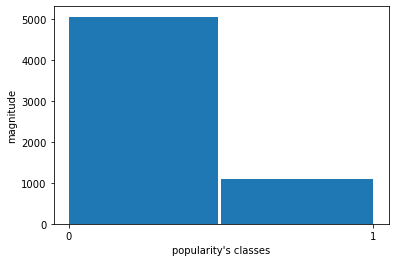

In [7]:
y=y.astype(int)
plt.hist(y, bins=[0,0.49, 0.5, 1])
plt.xlabel("popularity's classes")
plt.ylabel("magnitude")
plt.xticks([0, 1])
print(X_train.iloc[0].shape)

Checking distribution of "popularity" variable

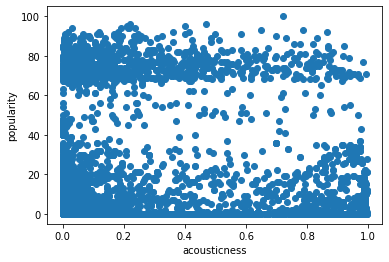

In [8]:
#plot to check the charateristic of popolarity
fig, ax=plt.subplots()
ax.scatter(data["acousticness"], data['popularity'], marker="o")

ax.set_xlabel("acousticness")
ax.set_ylabel("popularity")
plt.show()


In [32]:
#data balancing
def smote(x1, y1):
    sm = SMOTE()
    X_sm, y_sm = sm.fit_resample(x1, y1)
    return X_sm, y_sm

#do t-sne

#dimensional reduction techniques:
def scaling(xtrain,xtest):
    scaler = StandardScaler()
    scaler.fit(xtrain)
    X_scaled_train=scaler.transform(xtrain)
    X_scaled_test =scaler.transform(xtest)
    return X_scaled_train, X_scaled_test
'''
def pca(xtrain,xtest):
    pca = PCA(n_components=10)
    pca.fit(xtrain)
    X_pca_train=pca.transform(xtrain)
    X_pca_test =pca.transform(xtest)
    return X_pca_train, X_pca_test
'''
#train test split


#X_pca_train, X_pca_test=pca(X_train, X_test)

X_sm, y_sm = smote(X, y)




X_trainb, X_testb, y_trainb, y_testb = train_test_split(X_sm, y_sm, random_state=42)

X_trains, X_tests=scaling(X_trainb, X_testb)


In [33]:
print(X)
#website_data.to_csv("website_data.csv")

      popularity_artist
0                    34
1                    34
2                    34
3                    34
4                    34
...                 ...
6129                  0
6130                 42
6131                  0
6132                 61
6133                  0

[6134 rows x 1 columns]


K nearest neighbors with balanced data

In [37]:
knn = KNeighborsClassifier(n_neighbors=1).fit(X_trainb, y_trainb)
y_pred=knn.predict(X_test)
print("balanced knn Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred)))
print("balanced knn f1: {:.2f}".format(f1_score(y_test, y_pred)))  
print(classification_report(y_test, y_pred)) 
print()


RFC_AUC = roc_auc_score(y_test, y_pred) 
print("AUC knn: " + str(RFC_AUC))

scores = cross_val_score(knn, X_sm, y_sm, cv=5)
print(scores)

#'danceability', 'instrumentalness', 'energy', 'acousticness', 'explicit', 'speechiness', 'valence'


nomannocrysax=[0.775, 0.616, 0.601, 0.129, 0, 0.0849, 0.355]
stilldre=[ 0.816,0.00031,0.775,0.16,1, 0.234,0.527]
tonymontana=[0.61,0.0107,0.896,0.114,1,0.0507,0.623]
d=pd.Series(stilldre).values.reshape(1, -1)
#knn.predict(d)
print()

eclf1 = VotingClassifier(estimators=[('knn', knn), ('fr', RandomForestClassifier()), ('mlp', MLPClassifier(max_iter=500))], voting='soft')
eclf1 = eclf1.fit(X_trains, y_trainb)
y_pred=eclf1.predict(X_tests)
print("voting Accuracy: {:.2f}".format(accuracy_score(y_testb, y_pred)))
print("voting f1: {:.2f}".format(f1_score(y_testb, y_pred))) 
print(classification_report(y_testb, y_pred)) 
print()


RFC_AUC = roc_auc_score(y_testb, y_pred) 
print("AUC voting: " + str(RFC_AUC))

balanced knn Accuracy: 0.96
balanced knn f1: 0.88
              precision    recall  f1-score   support

       False       0.99      0.96      0.98      1283
        True       0.82      0.95      0.88       251

    accuracy                           0.96      1534
   macro avg       0.91      0.96      0.93      1534
weighted avg       0.96      0.96      0.96      1534


AUC knn: 0.9562203252461705
[0.93762376 0.95690936 0.9816741  0.94601288 0.96087172]

voting Accuracy: 0.96
voting f1: 0.96
              precision    recall  f1-score   support

       False       0.96      0.96      0.96      1281
        True       0.96      0.96      0.96      1243

    accuracy                           0.96      2524
   macro avg       0.96      0.96      0.96      2524
weighted avg       0.96      0.96      0.96      2524


AUC voting: 0.9595429958116741


In [35]:
#random forest

forest = RandomForestClassifier(n_estimators=1000).fit(X_trainb, y_trainb)
y_pred=forest.predict(X_testb)
print("balanced forest Accuracy: {:.2f}".format(accuracy_score(y_testb, y_pred)))
print("balanced forest f1: {:.2f}".format(f1_score(y_testb, y_pred)))  
print(classification_report(y_testb, y_pred)) 
print()
RFC_AUC = roc_auc_score(y_testb, y_pred) 
print("AUC forest: " + str(RFC_AUC))

balanced forest Accuracy: 0.96
balanced forest f1: 0.96
              precision    recall  f1-score   support

       False       0.98      0.95      0.96      1281
        True       0.95      0.98      0.96      1243

    accuracy                           0.96      2524
   macro avg       0.96      0.96      0.96      2524
weighted avg       0.96      0.96      0.96      2524


AUC forest: 0.9645609480224306


In [57]:
input_tensor=Input(shape=(8,))
output_result=Dense(1, activation='linear')(input_tensor)
output_probabilty=Dense(1, activation='sigmoid')(output_result)
model=Model(input_tensor, [output_result, output_probabilty])
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.fit(X_train, y_train, epochs=20)
model.evaluate(X_test, y_test)

Epoch 1/20
144/144 [==============================] - 1s 1ms/step - loss: 2.1639e-08 - dense_29_loss: 2.1639e-08 - dense_30_loss: 0.0000e+00 - dense_29_accuracy: 0.4622 - dense_30_accuracy: 0.7926
Epoch 2/20
144/144 [==============================] - 0s 834us/step - loss: 2.1639e-08 - dense_29_loss: 2.1639e-08 - dense_30_loss: 0.0000e+00 - dense_29_accuracy: 0.2428 - dense_30_accuracy: 0.8185
Epoch 3/20
144/144 [==============================] - 0s 858us/step - loss: 2.1639e-08 - dense_29_loss: 2.1639e-08 - dense_30_loss: 0.0000e+00 - dense_29_accuracy: 0.1820 - dense_30_accuracy: 0.8185
Epoch 4/20
144/144 [==============================] - 0s 858us/step - loss: 2.1639e-08 - dense_29_loss: 2.1639e-08 - dense_30_loss: 0.0000e+00 - dense_29_accuracy: 0.1815 - dense_30_accuracy: 0.8185
Epoch 5/20
144/144 [==============================] - 0s 872us/step - loss: 2.1639e-08 - dense_29_loss: 2.1639e-08 - dense_30_loss: 0.0000e+00 - dense_29_accuracy: 0.1815 - dense_30_accuracy: 0.8185
Epoch 6

[1.9505563386701397e-08,
 1.9505563386701397e-08,
 0.0,
 0.16362451016902924,
 0.8363754749298096]

In [16]:

data['pop_third']=pd.cut(data['popularity'],bins=[-1,20,60, 101],labels=[1,2,3])

(8,)


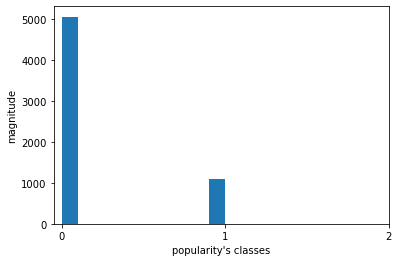

In [17]:
y3=data["pop_third"]
X3_train, X3_test, y3_train, y3_test = train_test_split(X, y, random_state=42)     

plt.hist(y)

plt.xlabel("popularity's classes")
plt.ylabel("magnitude")
plt.xticks([0, 1, 2])
print(X_train.iloc[0].shape)
     #   bins=[0,0.49, 0.5, 1]

In [18]:
#data balancing
def smote(x1, y1):
    sm = SMOTE()
    X_sm, y_sm = sm.fit_resample(x1, y1)
    return X_sm, y_sm

#do t-sne

#dimensional reduction techniques:
def scaling(xtrain,xtest):
    scaler = StandardScaler()
    scaler.fit(xtrain)
    X_scaled_train=scaler.transform(xtrain)
    X_scaled_test =scaler.transform(xtest)
    return X_scaled_train, X_scaled_test
'''
def pca(xtrain,xtest):
    pca = PCA(n_components=10)
    pca.fit(xtrain)
    X_pca_train=pca.transform(xtrain)
    X_pca_test =pca.transform(xtest)
    return X_pca_train, X_pca_test
'''
#train test split
'''
X_scaled_train, X_scaled_test=scaling(X_train, X_test)
X_pca_train, X_pca_test=pca(X_train, X_test)'''
#data["pop_third"].isnull().values.any() 
    
X, y3_sm = smote(X, y3)
X3_trainb, X3_testb, y3_trainb, y3_testb = train_test_split(website_data, y3_sm, random_state=42)

In [70]:
website_data["pop_three"]=y3_sm

print(website_data)

       danceability  instrumentalness    energy  acousticness  explicit  \
0          0.644000          0.000022  0.212000      0.881000         0   
1          0.627000          0.000162  0.184000      0.955000         0   
2          0.581000          0.000015  0.331000      0.888000         0   
3          0.442000          0.000499  0.399000      0.930000         0   
4          0.570000          0.000000  0.176000      0.949000         0   
...             ...               ...       ...           ...       ...   
13279      0.706451          0.000000  0.799531      0.029855         0   
13280      0.685532          0.000055  0.556999      0.141602         0   
13281      0.416649          0.000021  0.700520      0.006363         0   
13282      0.861489          0.000000  0.480628      0.691707         1   
13283      0.642280          0.000000  0.722591      0.022620         1   

       speechiness   valence  popularity_artist pop_three  
0         0.034700  0.441000           

In [26]:
knn = KNeighborsClassifier(n_neighbors=1).fit(X3_trainb, y3_trainb)
y3_pred=knn.predict(X3_testb)
print("balanced knn Accuracy: {:.2f}".format(accuracy_score(y3_testb, y3_pred)))
print("balanced knn f1: {:.2f}".format(f1_score(y3_testb, y3_pred, average="micro")))  
print(classification_report(y3_testb, y3_pred)) 
print()
RFC_AUC = roc_auc_score(y3_testb, y3_pred, multi_class='ovr') 
print("AUC knn: " + str(RFC_AUC))

#RFC_AUC = roc_auc_score(y3_testb, y3_pred) 
#print("AUC: " + str(RFC_AUC))

scores = cross_val_score(knn, X3_sm, y3_sm, cv=5)
print(scores)

balanced knn Accuracy: 0.95
balanced knn f1: 0.95
              precision    recall  f1-score   support

           1       0.97      0.92      0.95      1117
           2       0.92      0.96      0.94      1099
           3       0.96      0.97      0.97      1105

    accuracy                           0.95      3321
   macro avg       0.95      0.95      0.95      3321
weighted avg       0.95      0.95      0.95      3321




AxisError: axis 1 is out of bounds for array of dimension 1

In [20]:
eclf1 = VotingClassifier(estimators=[('knn', knn), ('rf', RandomForestClassifier()), ('mlp', MLPClassifier(max_iter=500))], voting='soft')
eclf1 = eclf1.fit(X3_trainb, y3_trainb)
y_pred=eclf1.predict(X3_testb)
print("voting Accuracy: {:.2f}".format(accuracy_score(y3_testb, y_pred)))
print("voting f1: {:.2f}".format(f1_score(y3_testb, y_pred, average="macro"))) 
print(classification_report(y3_testb, y_pred)) 


voting Accuracy: 0.95
voting f1: 0.95
              precision    recall  f1-score   support

           1       0.98      0.91      0.94      1117
           2       0.91      0.96      0.94      1099
           3       0.96      0.97      0.97      1105

    accuracy                           0.95      3321
   macro avg       0.95      0.95      0.95      3321
weighted avg       0.95      0.95      0.95      3321



In [21]:
forest = RandomForestClassifier(n_estimators=1000).fit(X3_trainb, y3_trainb)
y_pred=forest.predict(X3_testb)
print("balanced forest Accuracy: {:.2f}".format(accuracy_score(y3_testb, y_pred)))
print("balanced forest f1: {:.2f}".format(f1_score(y3_testb, y_pred, average="macro")))  
print(classification_report(y3_testb, y_pred)) 
print()

balanced forest Accuracy: 0.95
balanced forest f1: 0.95
              precision    recall  f1-score   support

           1       0.98      0.91      0.94      1117
           2       0.91      0.96      0.93      1099
           3       0.96      0.97      0.96      1105

    accuracy                           0.95      3321
   macro avg       0.95      0.95      0.95      3321
weighted avg       0.95      0.95      0.95      3321


